In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
# test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [6]:
# making dateTime column as a index for the test_new panda dataframe
test_new = test_new.set_index('dateTime')

In [7]:
multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','RWWIHOB_HWT0','RWWIHOB_MWT0',
                        'AEWIHO_T9AV2','AEDAHO_T9_V2'] # choose column with which the following work will be conducted

In [8]:
size_column = len(multivariate_column_label)
print(size_column)

6


In [9]:
multivariate_data=test_new.iloc[500:18000][multivariate_column_label]
multivariate_data=multivariate_data.loc[::-1]

In [10]:
multivariate_data.head()

,DEWIHOBT9_I0,AEDATZ_HO_V0,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2,AEDAHO_T9_V2
dateTime,,,,,,
2019-03-21 23:21:00,100.0,41.361023,97.068136,97.762204,77.228514,73.880073
2019-03-21 23:22:00,100.0,41.029029,97.044139,97.784631,76.970870,73.332486
2019-03-21 23:23:00,100.0,40.848848,97.052145,97.734956,77.603184,72.955013
2019-03-21 23:24:00,100.0,40.879590,96.932183,97.711727,77.513527,72.977738
2019-03-21 23:25:00,100.0,40.980816,96.955369,97.722945,77.091041,73.189071


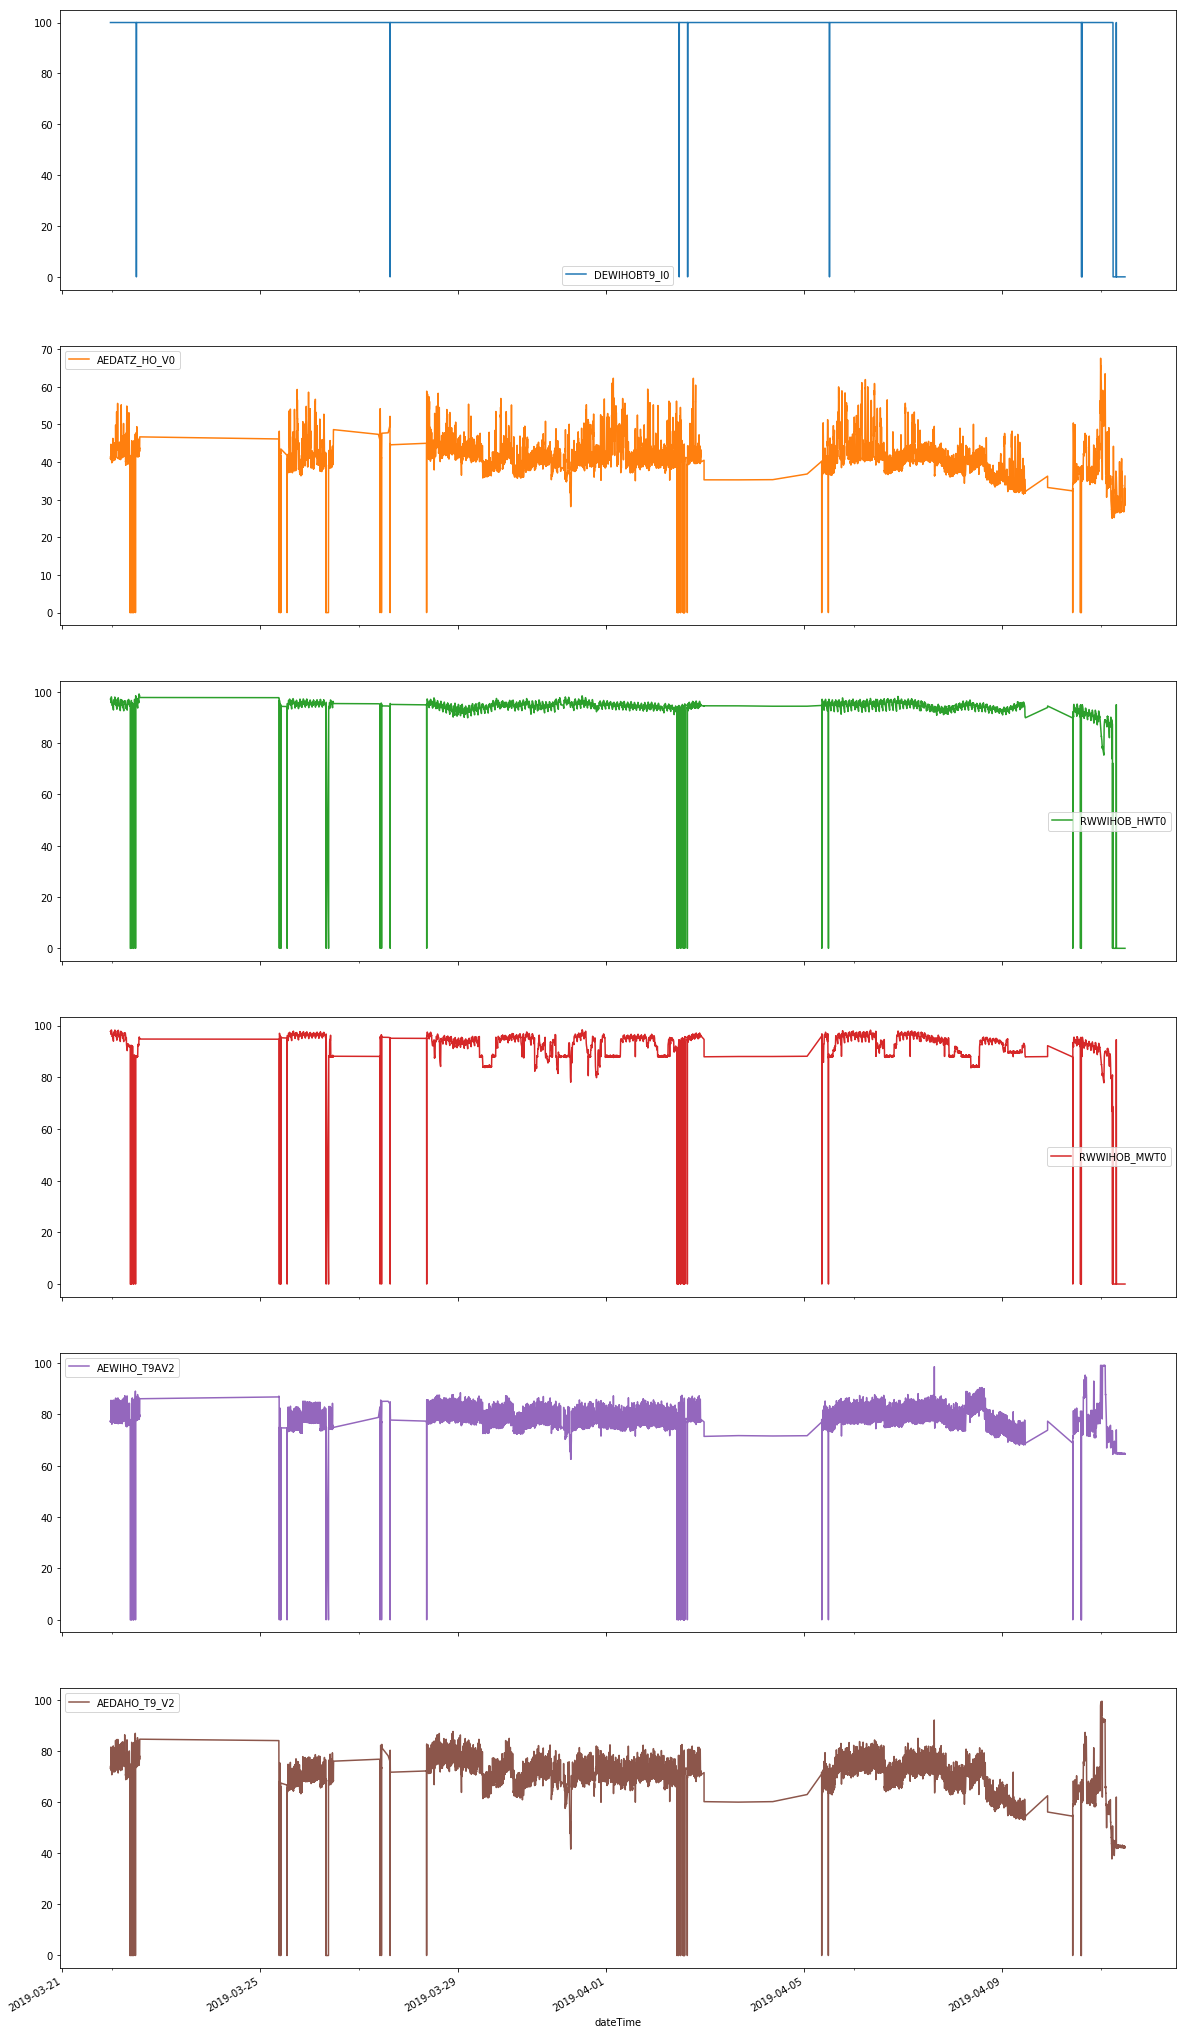

In [12]:
ax = multivariate_data.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,40)
# plt.savefig('E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/images_from_training/multivariate_data_regression.png')
plt.show()

# Below the row has deleted where DEWIHOBT9_I0 has 'zero' value

In [13]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in multivariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  359


In [14]:
multivariate_data_modify = multivariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated

In [15]:
print(multivariate_data.shape)
print(multivariate_data_modify.shape)

(17500, 6)
(17139, 6)


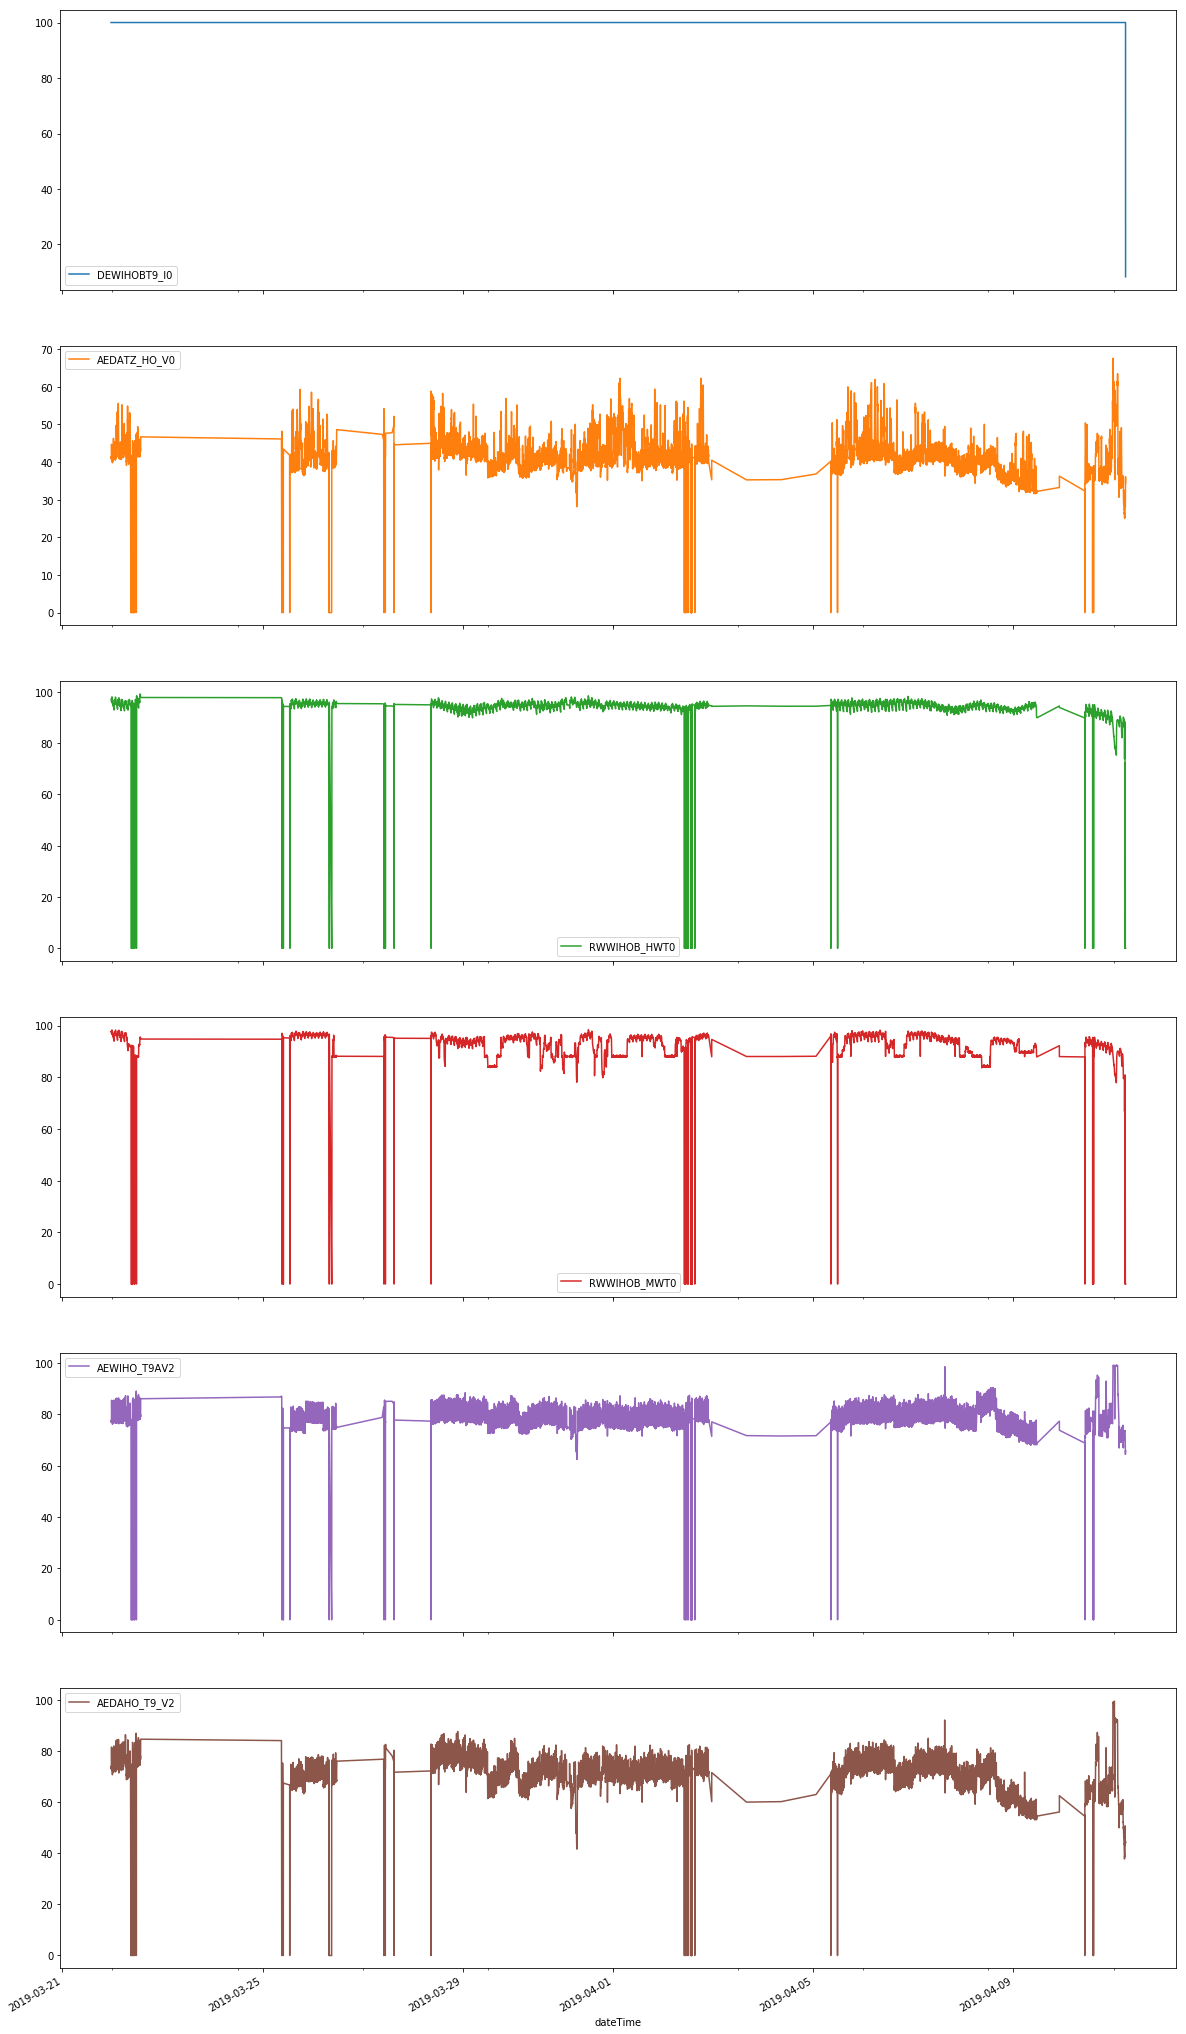

In [16]:
bx = multivariate_data_modify.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,40)
plt.show()

# Below the row will be deleted where any value of any column will be zero

In [17]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

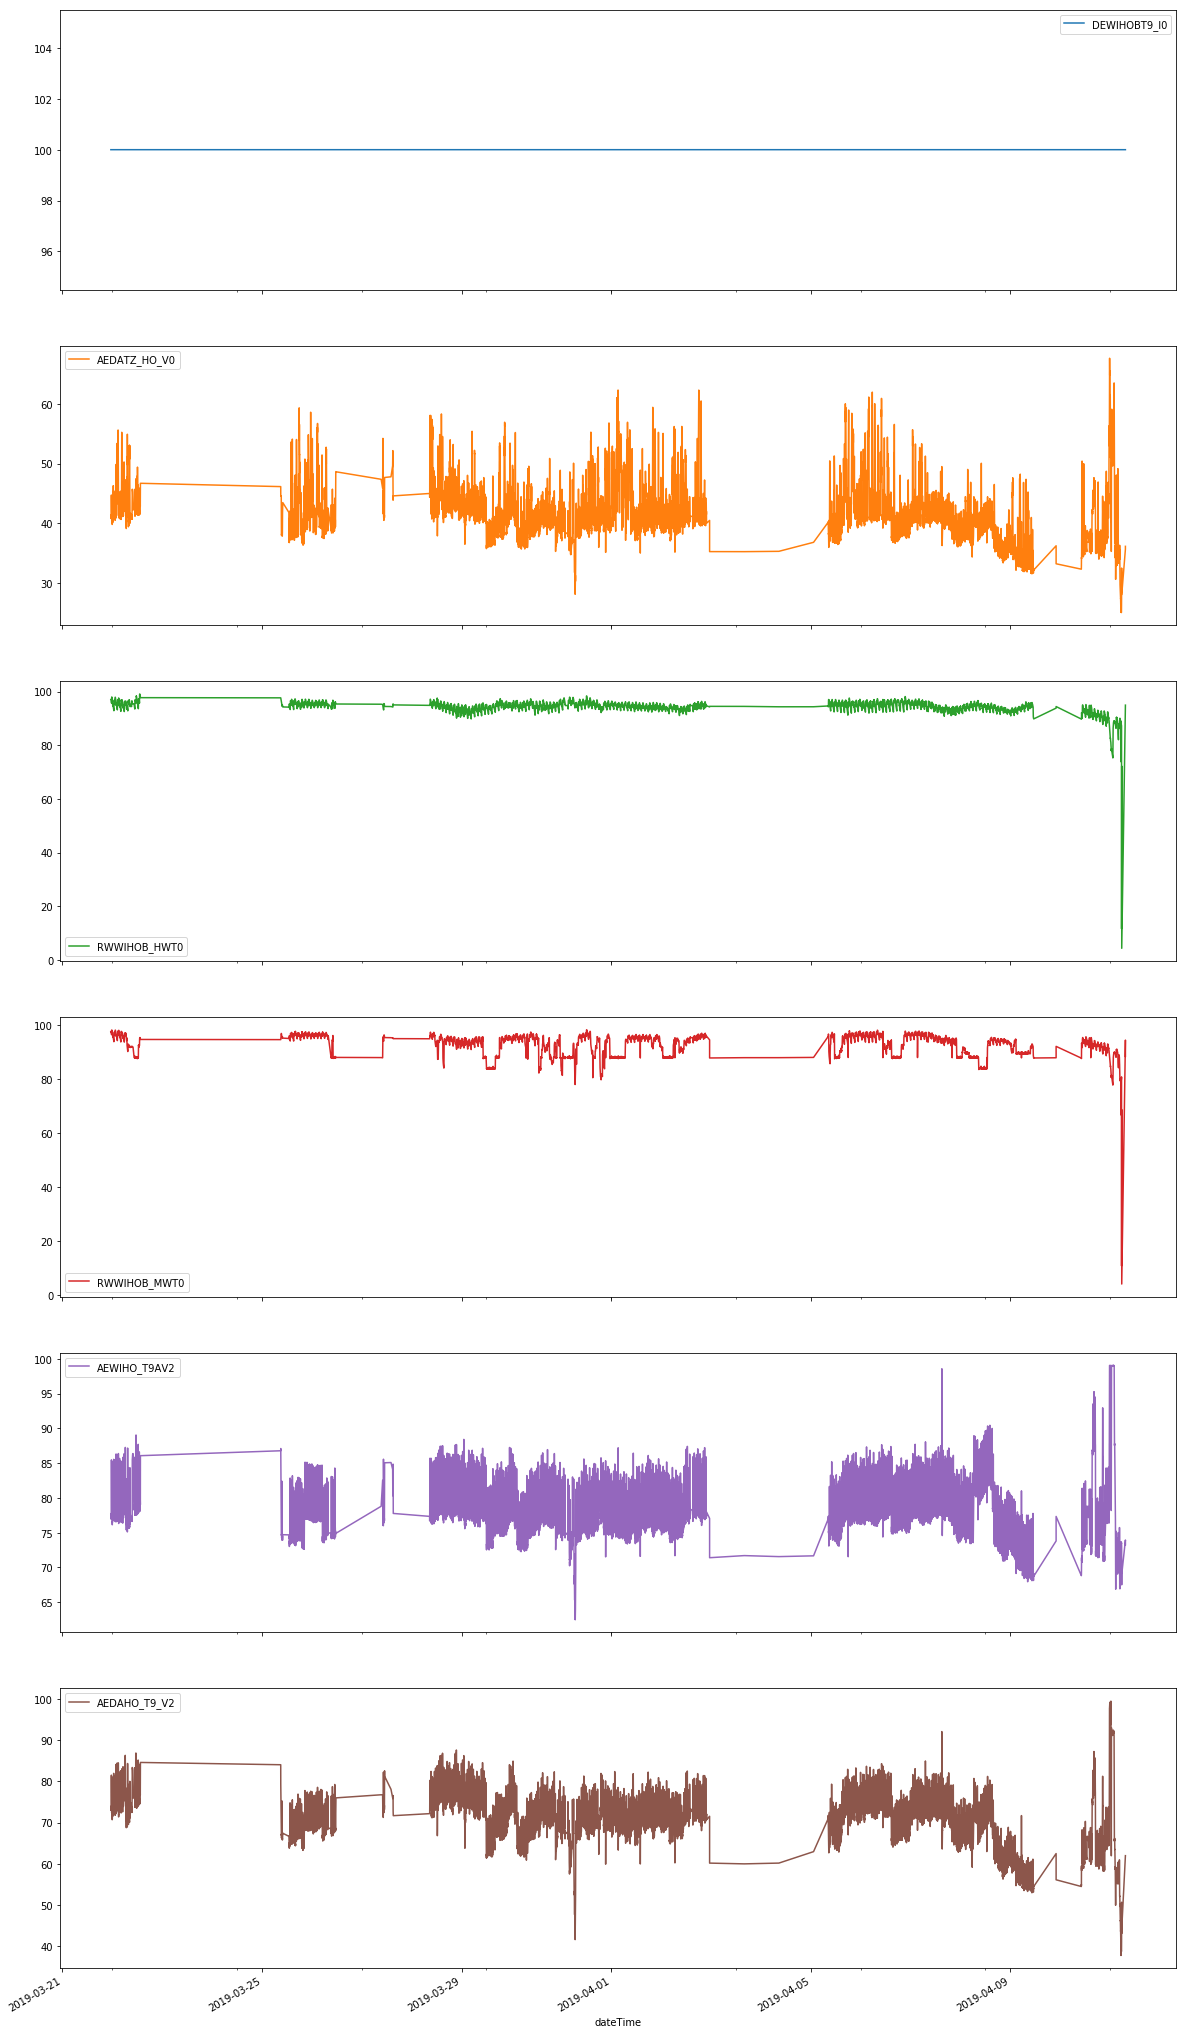

In [18]:
bx = multivariate_data_drop_zero.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,40)
plt.show()

In [19]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_modify: ', multivariate_data_modify.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)

shape of multivariate_data:  (17500, 6)
shape of multivariate_data_modify:  (17139, 6)
shape of multivariate_data_drop_zero:  (16968, 6)


In [21]:
multivariate_data_drop_zero.head()

,DEWIHOBT9_I0,AEDATZ_HO_V0,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2,AEDAHO_T9_V2
dateTime,,,,,,
2019-03-21 23:21:00,100.0,41.361023,97.068136,97.762204,77.228514,73.880073
2019-03-21 23:22:00,100.0,41.029029,97.044139,97.784631,76.970870,73.332486
2019-03-21 23:23:00,100.0,40.848848,97.052145,97.734956,77.603184,72.955013
2019-03-21 23:24:00,100.0,40.879590,96.932183,97.711727,77.513527,72.977738
2019-03-21 23:25:00,100.0,40.980816,96.955369,97.722945,77.091041,73.189071


In [20]:
# print('multivariate_data_drop_zero head: \n',multivariate_data_drop_zero.head())
dataset=np.array(multivariate_data_drop_zero)

In [22]:
NumberOfElements=int(len(dataset)*0.8)
print('Number of Elements for training: ',NumberOfElements)
print('dataset length: ',len(dataset))

train_input=dataset[0:NumberOfElements,0:-1]
print('train_input shape: ',train_input.shape)
train_output=dataset[0:NumberOfElements,-1]
print('train_output shape: ',train_output.shape)

test_input=dataset[NumberOfElements:len(dataset),0:-1]
print('test_input shape: ',test_input.shape)
test_output=dataset[NumberOfElements:len(dataset),-1]
print('test_output shape: ',test_output.shape)
# print('train data size: ',train_data.shape,'\ntest data size: ',test_data.shape)

Number of Elements for training:  13574
dataset length:  16968
train_input shape:  (13574, 5)
train_output shape:  (13574,)
test_input shape:  (3394, 5)
test_output shape:  (3394,)


# Linear Regression

In [23]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [24]:
train_model=LinearRegression(fit_intercept=False,normalize=True).fit(train_input,train_output)
print(train_model)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=True)


In [25]:
predicted_output=train_model.predict(test_input)

In [28]:
print('test_output size: ',test_output.size)
print('predicted output size: ',predicted_output.size)

test_output size:  3394
predicted output size:  3394


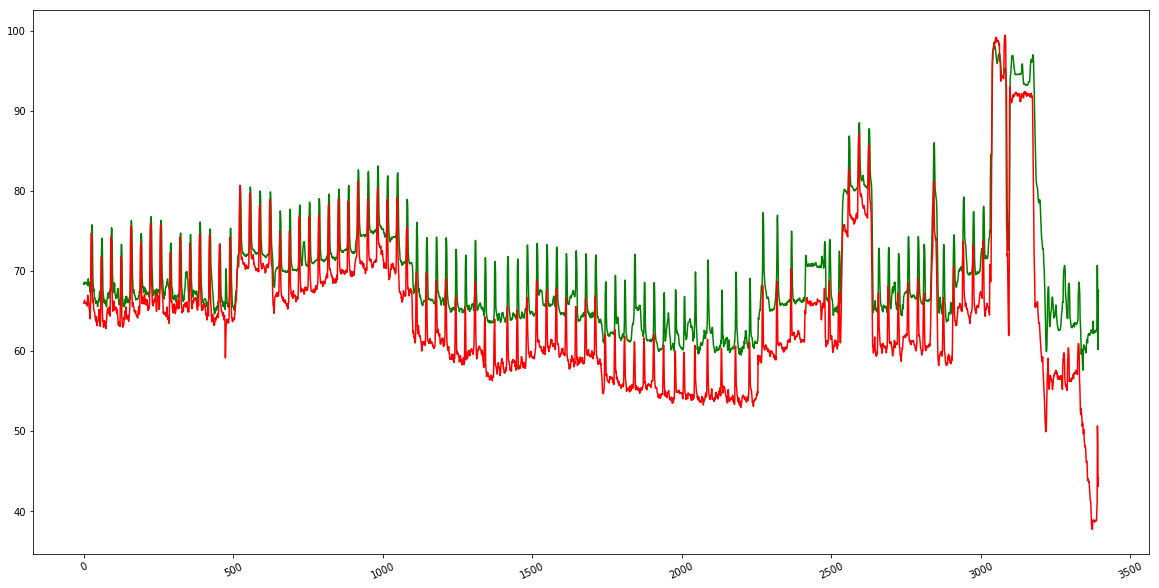

In [78]:
plt.plot(predicted_output,color='green')
plt.plot(test_output,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [31]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('Slope:' ,train_model.coef_)
print('Intercept:', train_model.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

Slope: [-0.00918417  0.27646176 -0.25409522  0.16828477  0.88711177]
Intercept: 0.0
r_2 statistic: 0.51
Mean_absolute_error: 5.25
Mean squared error: 38.94
RMSE:  6.239815946139104


new data shape:  (50, 6)
new_data_array shape:  (50, 6)
250
50
size of actual op:  50
size of predicted op:  50


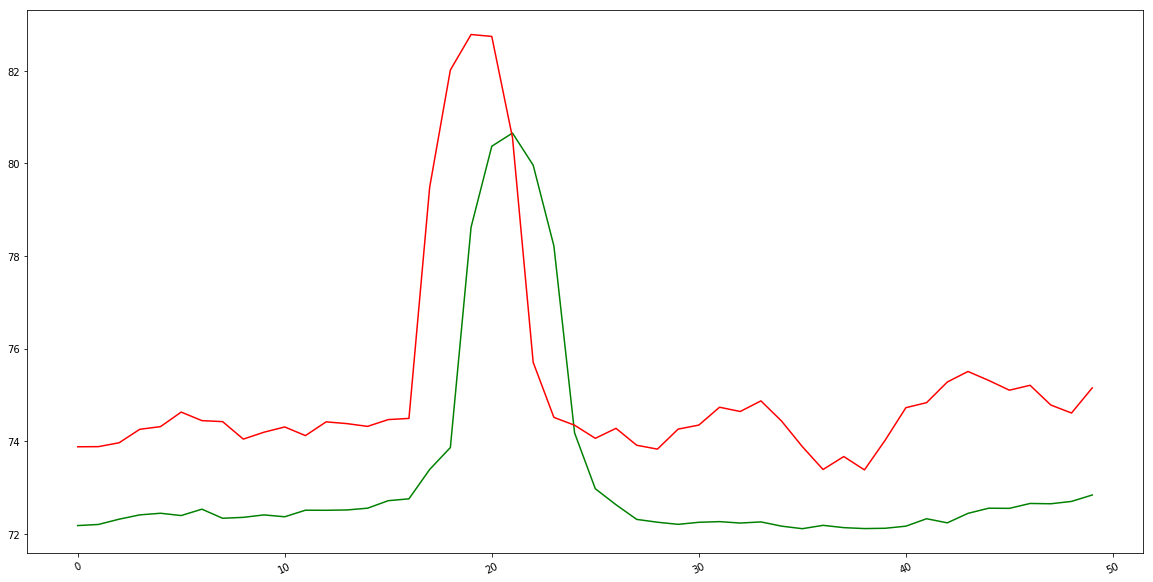

Slope: [-0.00918417  0.27646176 -0.25409522  0.16828477  0.88711177]
Intercept: 0.0
r_2 statistic: -0.36
Mean_absolute_error: 2.26
Mean squared error: 6.70
RMSE:  2.5891613662927755


In [79]:
# new dataset
new_data = test_new.iloc[24700:24750][multivariate_column_label]
# new_data = new_data.set_index('dateTime')
new_data= new_data.loc[::-1]
print('new data shape: ',new_data.shape)

new_data= new_data.replace(0,nan)
new_data= new_data.dropna(how='any',axis=0)

new_data_array=np.array(new_data)
print('new_data_array shape: ',new_data_array.shape)

new_train=new_data_array[:,0:-1]
new_test=new_data_array[:,-1]
print(new_train.size)
print(new_test.size)

new_pred_output=train_model.predict(new_train)

print('size of actual op: ',new_test.size)
print('size of predicted op: ',new_pred_output.size)
plt.plot(new_pred_output,color='green')
plt.plot(new_test,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('Slope:' ,train_model.coef_)
print('Intercept:', train_model.intercept_)
print('r_2 statistic: %.2f' % r2_score(new_test,new_pred_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(new_test,new_pred_output))
print("Mean squared error: %.2f" % mean_squared_error(new_test,new_pred_output))
RMSE=math.sqrt(mean_squared_error(new_test,new_pred_output))
print('RMSE: ',RMSE)

# Below the dataset has converted to normalized value. now we will check the accuracy and then demornalized it and again check the accuracy

In [53]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(multivariate_data_drop_zero)
# col_label=['AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0','AEWIHOAKZ_V0','RWWIHOA_MWT0','AEDAHO_T9_V2']
multivariate_normalized = pd.DataFrame(np_scaled,index=multivariate_data_drop_zero.index,columns=multivariate_column_label)

In [54]:
multivariate_normalized.head()

,DEWIHOBT9_I0,AEDATZ_HO_V0,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2,AEDAHO_T9_V2
dateTime,,,,,,
2019-03-21 23:21:00,0.0,0.382580,0.978506,0.993243,0.403374,0.585621
2019-03-21 23:22:00,0.0,0.374771,0.978253,0.993481,0.396325,0.576748
2019-03-21 23:23:00,0.0,0.370533,0.978338,0.992954,0.413624,0.570631
2019-03-21 23:24:00,0.0,0.371256,0.977072,0.992708,0.411171,0.570999
2019-03-21 23:25:00,0.0,0.373637,0.977316,0.992827,0.399613,0.574424


In [55]:
dataset_normalized = np.array(multivariate_normalized)

NumberOfElements_Normalized=int(len(dataset_normalized)*0.8)
print('Number of Elements for training: ',NumberOfElements_Normalized)
print('dataset length: ',len(dataset_normalized))

train_input_normalized = dataset_normalized[0:NumberOfElements_Normalized,0:-1]
print('train_input_normalized shape: ',train_input_normalized.shape)
train_output_normalized = dataset_normalized[0:NumberOfElements_Normalized,-1]
print('train_output_normalized shape: ',train_output_normalized.shape)

test_input_normalized = dataset_normalized[NumberOfElements_Normalized:len(dataset_normalized),0:-1]
print('test_input_normalized shape: ',test_input_normalized.shape)
test_output_normalized = dataset_normalized[NumberOfElements_Normalized:len(dataset_normalized),-1]
print('test_output_normalized shape: ',test_output_normalized.shape)
# print('train data size: ',train_data.shape,'\ntest data size: ',test_data.shape)

Number of Elements for training:  13574
dataset length:  16968
train_input_normalized shape:  (13574, 5)
train_output_normalized shape:  (13574,)
test_input_normalized shape:  (3394, 5)
test_output_normalized shape:  (3394,)


In [57]:
train_model_normalized = LinearRegression(fit_intercept=False).fit(train_input_normalized,train_output_normalized)
print(train_model)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=True)


In [58]:
predicted_output_normalized = train_model_normalized.predict(test_input_normalized)
print('test_output normalized size: ',test_output_normalized.size)
print('predicted output normalized size: ',predicted_output_normalized.size)

test_output normalized size:  3394
predicted output normalized size:  3394


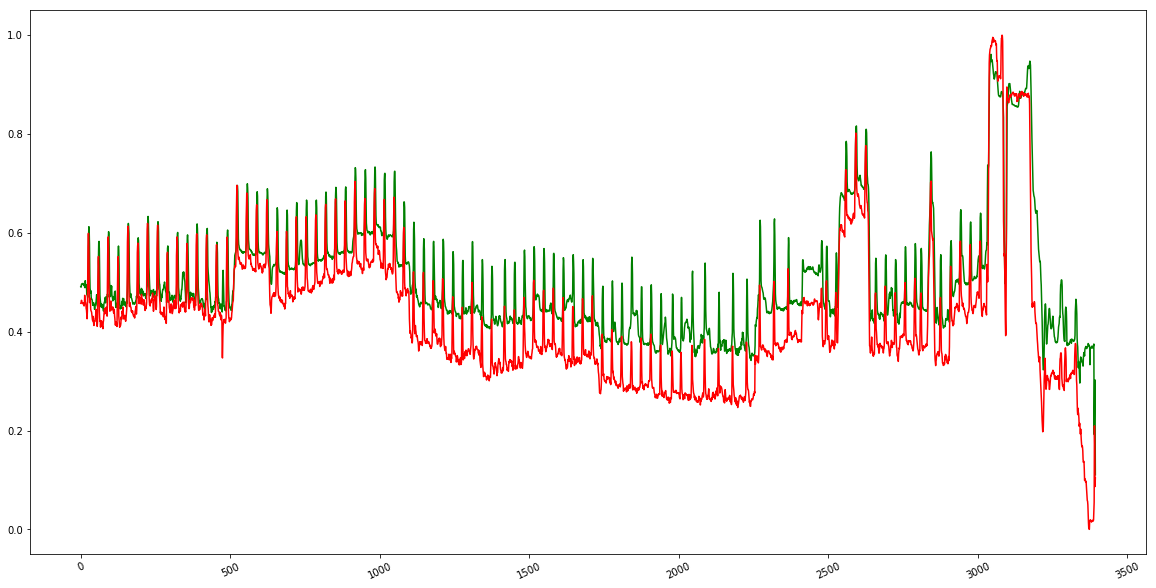

In [61]:
plt.plot(predicted_output_normalized,color='green')
plt.plot(test_output_normalized,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [62]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('Slope:' ,train_model_normalized.coef_)
print('Intercept:', train_model_normalized.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output_normalized,predicted_output_normalized))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output_normalized,predicted_output_normalized))
print("Mean squared error: %.2f" % mean_squared_error(test_output_normalized,predicted_output_normalized))
RMSE=math.sqrt(mean_squared_error(test_output_normalized,predicted_output_normalized))
print('RMSE: ',RMSE)

Slope: [ 0.          0.18877242 -0.01231504  0.26647119  0.54573846]
Intercept: 0.0
r_2 statistic: 0.60
Mean_absolute_error: 0.08
Mean squared error: 0.01
RMSE:  0.0913449944487161


# Unnormalized target value column to check the model accuracy again with the help of normalized trained model

In [68]:
max_array=[]
i=0
for idx,val in enumerate(list(multivariate_data_drop_zero.columns)):
    x=multivariate_data_drop_zero[val].max()
    q=[val,x]
    max_array.append(q)
print('max array: ',max_array)
target_column_max_value=max_array[-1][-1]
print('target column max value: ',target_column_max_value)

unnormalized_predicted_value = predicted_output_normalized*target_column_max_value
unnormalized_test_value = test_output_normalized*target_column_max_value

max array:  [['DEWIHOBT9_I0', 100.0], ['AEDATZ_HO_V0', 67.61101867732815], ['RWWIHOB_HWT0', 99.10508131333359], ['RWWIHOB_MWT0', 98.39916826699958], ['AEWIHO_T9AV2', 99.03705800931169], ['AEDAHO_T9_V2', 99.4516393320581]]
target column max value:  99.4516393320581


In [69]:
print(unnormalized_predicted_value)
print('\n')
print(unnormalized_test_value)

[48.80049353 48.73811497 49.20841567 ... 30.11398337 26.47643191
 10.99418447]


[45.48792959 45.68367057 46.09812145 ... 17.1640465   8.61750865
 10.35226199]


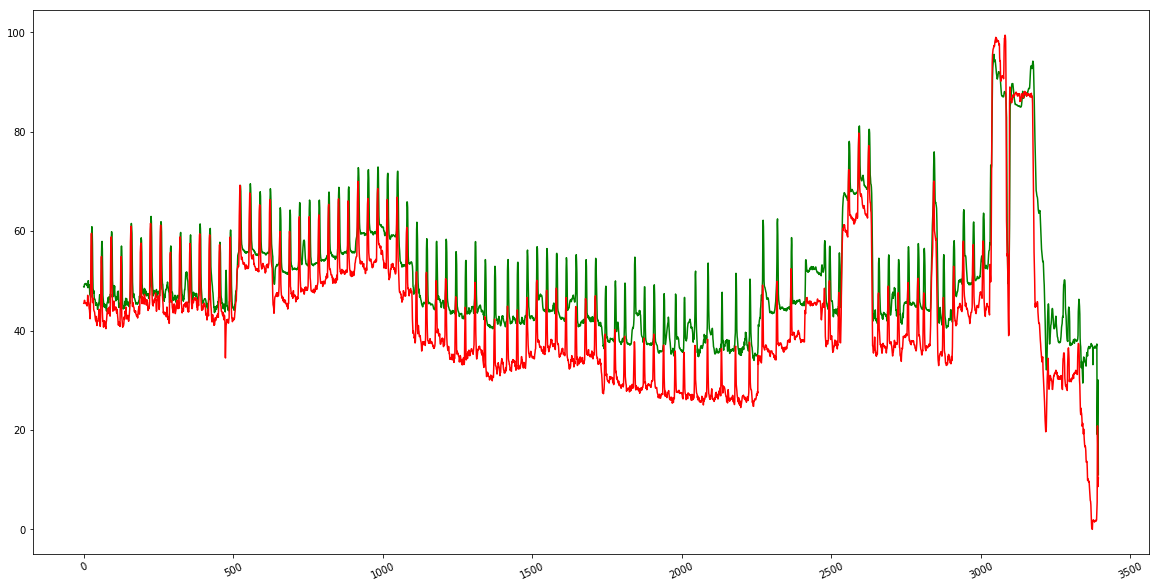

In [73]:
plt.plot(unnormalized_predicted_value,color='green')
plt.plot(unnormalized_test_value,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [74]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
# print('Slope:' ,train_model_normalized.coef_)
# print('Intercept:', train_model_normalized.intercept_)
print('r_2 statistic: %.2f' % r2_score(unnormalized_test_value, unnormalized_predicted_value))
print("Mean_absolute_error: %.2f" % mean_absolute_error(unnormalized_test_value, unnormalized_predicted_value))
print("Mean squared error: %.2f" % mean_squared_error(unnormalized_test_value, unnormalized_predicted_value))
RMSE=math.sqrt(mean_squared_error(unnormalized_test_value, unnormalized_predicted_value))
print('RMSE: ',RMSE)

r_2 statistic: 0.60
Mean_absolute_error: 7.63
Mean squared error: 82.53
RMSE:  9.084409442702563


In [70]:
# p= train_model_normalized.predict(train_input)
# print(p)

In [71]:
# p_1 = train_model_normalized.predict(train_input_normalized)
# print(p_1)

# Support Vector Machine

In [43]:
import seaborn as sn
from sklearn import svm
# from sklearn import preprocessing, cross_validation, neighbors, svm
from sklearn.svm import SVR

In [44]:
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(train_input, train_output, test_size=0.2)

clf= SVR(kernel='rbf', C=10, gamma='auto', degree=3, epsilon=.1,coef0=1)

clf.fit(train_input,train_output)

SVR(C=10, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [45]:
predicted_output_SVM=clf.predict(test_input)

In [46]:
print(predicted_output_SVM)
print('size of actual op: ',test_output.shape)
print('size of predicted op: ',predicted_output_SVM.shape)

[65.96073444 66.09018224 66.27634582 ... 71.37765125 71.37765125
 71.37765125]
size of actual op:  (3394,)
size of predicted op:  (3394,)


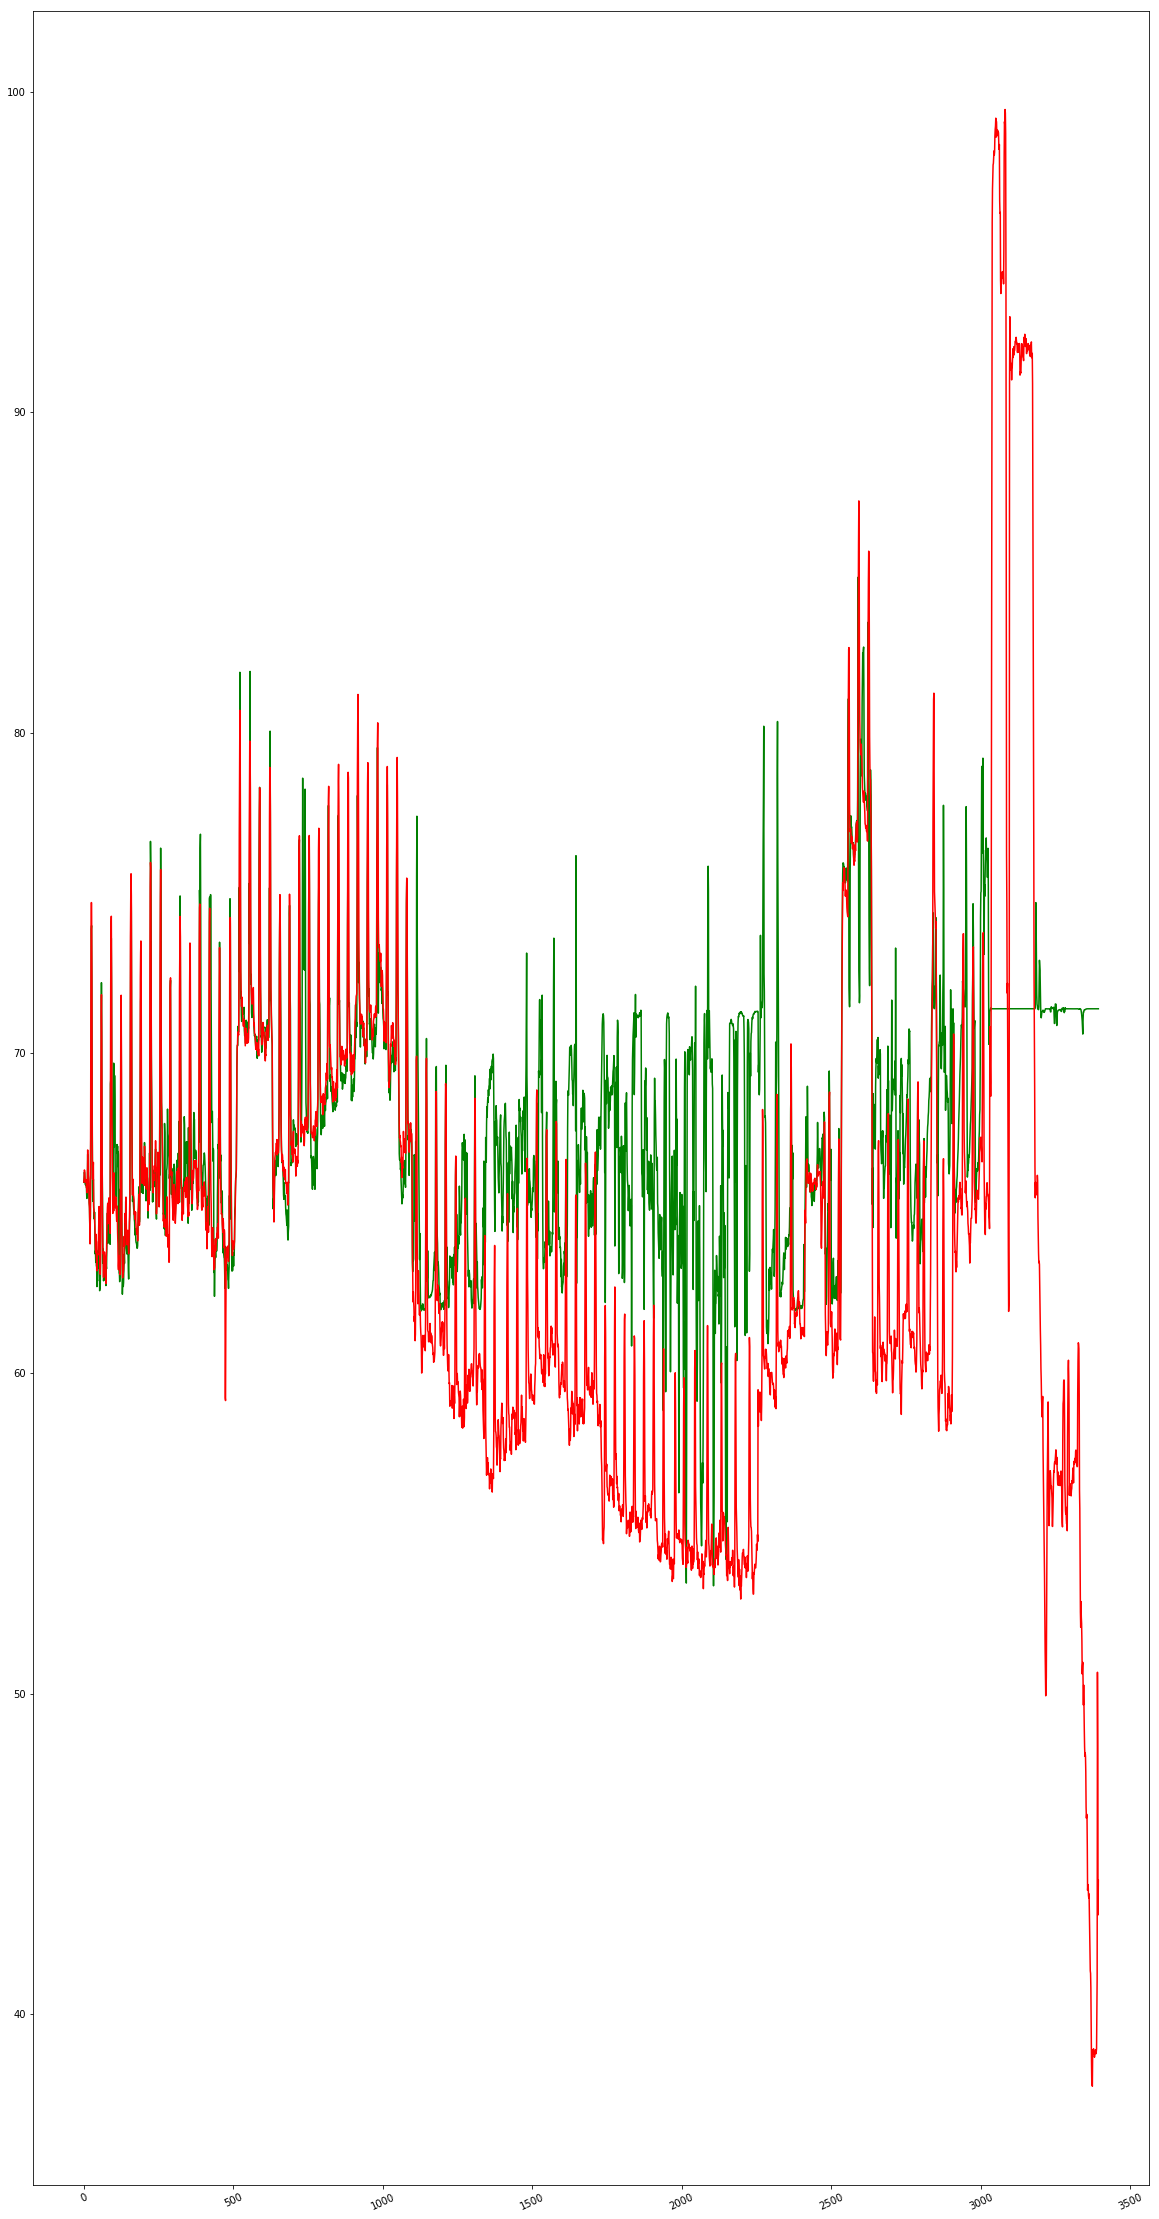

In [47]:
plt.plot(predicted_output_SVM,color='green')
plt.plot(test_output,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, train_input, train_output, cv=5)
print(scores)

[0.61518648 0.71745574 0.08556335 0.55133953 0.73320508]


In [49]:
confidence = clf.score(test_input,test_output)
print('confidence: ',confidence)
print('score: ',clf.score(test_input,test_output))
from sklearn.metrics import r2_score
print('r2_score: ',r2_score(test_output,predicted_output_SVM))

confidence:  -0.018480711970820796
score:  -0.018480711970820796
r2_score:  -0.018480711970820796


In [51]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
# print('Slope:' , clf.coef_)
print('Intercept:', clf.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output, predicted_output_SVM))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output, predicted_output_SVM))
print("Mean squared error: %.2f" % mean_squared_error(test_output, predicted_output_SVM))
RMSE=math.sqrt(mean_squared_error(test_output, predicted_output_SVM))
print('RMSE: ',RMSE)

Intercept: [71.37765125]
r_2 statistic: -0.02
Mean_absolute_error: 5.96
Mean squared error: 80.36
RMSE:  8.964454359514917
